<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#what-about-factorized-numFullundo-&amp;-condition" data-toc-modified-id="what-about-factorized-numFullundo-&amp;-condition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>what about factorized numFullundo &amp; condition</a></span></li></ul></div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel, ttest_ind

In [4]:
import rpy2

In [5]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
# import R's "base" package
utils = importr('utils')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
from rpy2.robjects.vectors import StrVector

packnames = ['lme4', 'optimx', 'pbkrtest', 'lmerTest',
             'ggplot2', 'dplyr', 'sjPlot', 'car']

# if there is no package then install it
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [6]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjp = importr('sjPlot')
sjmisc = importr('sjmisc')
car = importr('car')
lattice = importr('lattice')

C:\Users\dongj\anaconda3\envs\base37\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [7]:
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'
# home_dir = 'G:\.shortcut-targets-by-id\\1sYZNVBbYCrHcHjo-9xdKcA4wLnob9ZEq\\road_construction\\data\\2022_online\\R_analysis_data\\'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()

# undo (factorized)

In [31]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [32]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [33]:
%%R
# this case 
model0 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo_factor + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo_factor + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model4)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19025.8  19175.6  -9491.9  18983.8     9271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9231 -0.6531 -0.3216  0.4689  8.8676 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275464 0.52485      
          condition   0.004840 0.06957  0.60
 puzzleID (Intercept) 0.188543 0.43421      
          numFullUndo 0.001807 0.04251  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.460959   0.084219  -5.473 4.42e-08 ***
condition            -0.115460   0.016932  -6.819 9.16e-12 ***
numFullUndo_factor1  -0.110659   0.052816  -2.095   

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0145502 (tol = 0.002, component 1)
Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?



In [40]:
%%R
anova(model0, model1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + numFullUndo | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0   17 19037 19159 -9501.7    19003                     
model1   19 19039 19175 -9500.6    19001 2.1614  2     0.3394


In [39]:
%%R

anova(model0, model2)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
model0   17 19037 19159 -9501.7    19003                         
model2   19 19027 19162 -9494.2    18989 14.879  2  0.0005876 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [37]:
%%R

anova(model2, model3)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model3: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model3   21 19026 19176 -9491.9    18984 4.6272  2     0.0989 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [38]:
%%R

anova(model2, model4)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model4: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model4   21 19026 19176 -9491.9    18984 4.7359  2    0.09367 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# undo once vs. more than once. (factorized)

In [9]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [10]:
dat['numFullUndo_factor'][dat['numFullUndo_factor']==1] = 1
dat['numFullUndo_factor'][dat['numFullUndo_factor']>=2] = 2

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [12]:
%%R
# this case 
model0 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo_factor + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo_factor + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model4)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19006.1  19077.5  -9493.1  18986.1     9282 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9197 -0.6530 -0.3234  0.4673  8.8272 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.276992 0.52630      
          condition   0.004992 0.07065  0.61
 puzzleID (Intercept) 0.188895 0.43462      
          numFullUndo 0.001776 0.04215  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.45737    0.08400  -5.445 5.19e-08 ***
condition           -0.11619    0.01698  -6.842 7.80e-12 ***
numFullUndo_factor1 -0.10937    0.05243  -2.086    0.037 *

In [13]:
%%R
anova(model0, model1_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1_1: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model0      6 19019 19062 -9503.7    19007                       
model1_1    8 19018 19075 -9501.0    19002 5.3147  2    0.07013 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [14]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [15]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [16]:
%%R
# this case 
model0 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo_factor + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo_factor + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model4)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19025.8  19175.6  -9491.9  18983.8     9271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9231 -0.6531 -0.3216  0.4689  8.8676 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275464 0.52485      
          condition   0.004840 0.06957  0.60
 puzzleID (Intercept) 0.188543 0.43421      
          numFullUndo 0.001807 0.04251  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.460959   0.084219  -5.473 4.42e-08 ***
condition            -0.115460   0.016932  -6.819 9.16e-12 ***
numFullUndo_factor1  -0.110659   0.052816  -2.095   

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0145502 (tol = 0.002, component 1)
Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?



In [17]:
%%R
anova(model0, model1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + numFullUndo | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0   17 19037 19159 -9501.7    19003                     
model1   19 19039 19175 -9500.6    19001 2.1614  2     0.3394


In [18]:
%%R
anova(model0, model1_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1_1: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0     17 19037 19159 -9501.7    19003                     
model1_1   19 19037 19173 -9499.6    18999 4.2615  2     0.1187


In [19]:
%%R
anova(model0, model2_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2_1: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0     17 19037 19159 -9501.7    19003                     
model2_1   19 19037 19173 -9499.5    18999 4.4665  2     0.1072


In [20]:
%%R
anova(model0, model2)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
model0   17 19037 19159 -9501.7    19003                         
model2   19 19027 19162 -9494.2    18989 14.879  2  0.0005876 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [21]:
%%R
anova(model0, model2_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2_1: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0     17 19037 19159 -9501.7    19003                     
model2_1   19 19037 19173 -9499.5    18999 4.4665  2     0.1072


In [22]:
%%R
anova(model0, model2)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
model0   17 19037 19159 -9501.7    19003                         
model2   19 19027 19162 -9494.2    18989 14.879  2  0.0005876 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [23]:
%%R
anova(model2, model3)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model3: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model3   21 19026 19176 -9491.9    18984 4.6272  2     0.0989 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [24]:
%%R
anova(model2, model4)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model4: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model4   21 19026 19176 -9491.9    18984 4.7359  2    0.09367 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [25]:
%%R
anova(model2, model3)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model3: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model3   21 19026 19176 -9491.9    18984 4.6272  2     0.0989 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [26]:
%%R
anova(model2, model4)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model4: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model4   21 19026 19176 -9491.9    18984 4.7359  2    0.09367 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [27]:
%%R
summary(model4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19025.8  19175.6  -9491.9  18983.8     9271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9231 -0.6531 -0.3216  0.4689  8.8676 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275464 0.52485      
          condition   0.004840 0.06957  0.60
 puzzleID (Intercept) 0.188543 0.43421      
          numFullUndo 0.001807 0.04251  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.460959   0.084219  -5.473 4.42e-08 ***
condition            -0.115460   0.016932  -6.819 9.16e-12 ***
numFullUndo_factor1  -0.110659   0.052816  -2.095   

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0145502 (tol = 0.002, component 1)
Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?



In [29]:
%%R
summary(model4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19025.8  19175.6  -9491.9  18983.8     9271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9231 -0.6531 -0.3216  0.4689  8.8676 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275464 0.52485      
          condition   0.004840 0.06957  0.60
 puzzleID (Intercept) 0.188543 0.43421      
          numFullUndo 0.001807 0.04251  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.460959   0.084219  -5.473 4.42e-08 ***
condition            -0.115460   0.016932  -6.819 9.16e-12 ***
numFullUndo_factor1  -0.110659   0.052816  -2.095   

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0145502 (tol = 0.002, component 1)
Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?



In [43]:
%%R
summary(model4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19025.8  19175.6  -9491.9  18983.8     9271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9231 -0.6531 -0.3216  0.4689  8.8676 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275464 0.52485      
          condition   0.004840 0.06957  0.60
 puzzleID (Intercept) 0.188543 0.43421      
          numFullUndo 0.001807 0.04251  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.460959   0.084219  -5.473 4.42e-08 ***
condition            -0.115460   0.016932  -6.819 9.16e-12 ***
numFullUndo_factor1  -0.110659   0.052816  -2.095   

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0145502 (tol = 0.002, component 1)
Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?



$subject

$puzzleID



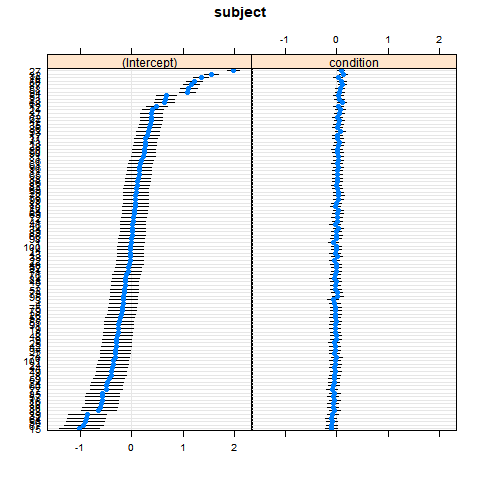

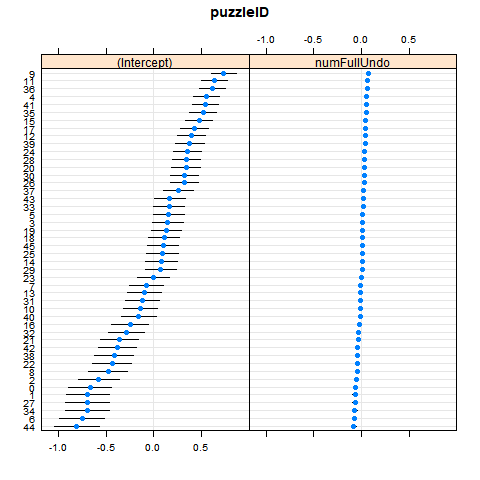

In [30]:
%%R

# theme_set(theme_sjplot())
# sjp.glmer(model2)
# plot_model(model2,type="pred",terms="condition")
# plot_model(model2,type="pred",terms="numFullUndo")
dotplot(ranef(model4,condVar=TRUE))
